In [1]:
from carUtils import *
from linesUtils import *
from env import *

In [14]:
def test_line_maker():
    lines=[]

    lines+=make_curve(90, 15, start_point=[0,0],n_lines=50,left=True)
    lines+=make_curve(-90, 15, start_point=[0,0],n_lines=10,left=False)
    
    return lines,15,-15,180

[ 638.93465602  694.83348241  703.4913907  1652.75972299  888.6600956
  607.88279124  557.19603628  579.65525658]


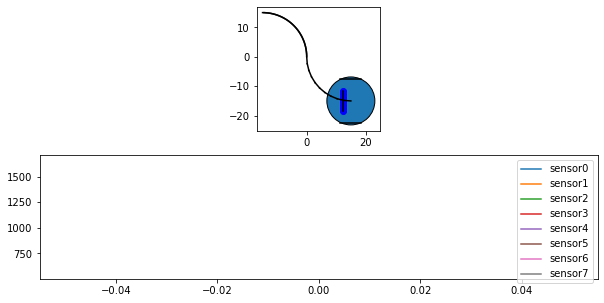

In [15]:
e=Env(line_generator=test_line_maker)
print(e.move_car(0,0))
e.plot("","")

In [11]:
for i in range(100*10*10):
    e.move_car(90,100)
    if e.off_track():
        print(i)
        break

0


In [5]:
e.car.X

-7.894508422996944

In [6]:
e.car.Y

46.613662019179316

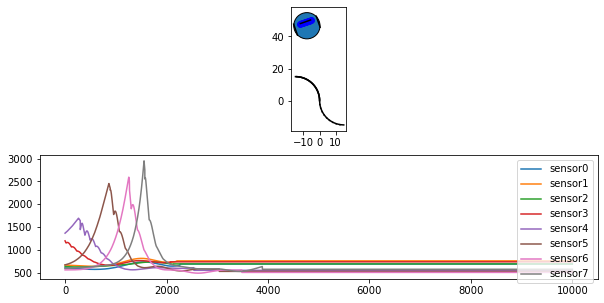

In [7]:
e.plot("","")

In [10]:
T=[]
X=[[],[],[],[],[],[],[],[]]
for file in glob.glob("measurements/*.npy"):
    t=int(file[len("measurements\\measurment"):-4])
    raw_data=np.load(file)
    T+=[t]*raw_data.shape[0]
    for i in range(8):
        X[i]+=list(raw_data[:,i])
        #print(raw_data[:,i].shape)
    
X=np.array(X)
#X=X[X>0]
T=np.array(T)

In [11]:
T=T[np.all(X<=2500,axis=0)]
X=X[:,np.all(X<=2500,axis=0)]


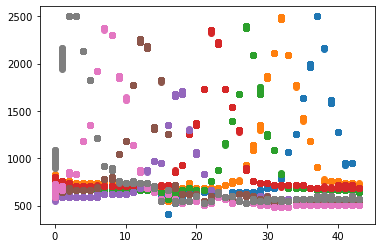

In [12]:
for i in range(8):
    plt.plot(T,X[i,:],"o")

In [13]:
import sklearn.svm

m=sklearn.svm.SVR(kernel="rbf").fit(T.reshape(-1, 1),X[7,:])

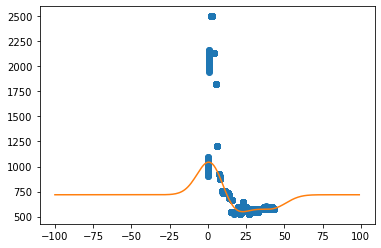

In [14]:

plt.plot(T,X[7,:],"o")
plt.plot(np.arange(-100,100),m.predict(np.arange(-100,100).reshape(-1, 1)))

In [15]:
Car_specs

{'diameter': 16.3,
 'wheel_distance': 7.45,
 'wheel diameter': 7.2,
 'num_sensors': 8,
 'sensor_array_distance': 2.6030000000000006,
 'sensor_spacing': 0.953}

In [16]:
sensor_locs=Car_specs['sensor_spacing']*3.5-np.arange(Car_specs['num_sensors'])*Car_specs['sensor_spacing']

In [17]:
line_locs=-4+T*0.2
np.max(line_locs)

4.6

In [18]:
np.min(line_locs)

-4.0

In [36]:
class SensorValueModel:
    def __init__(self):
        self.model=sklearn.svm.SVR()
        
    def fit(self,distance,values):
        self.model.fit(distance.reshape(-1, 1),np.log(values))
        self.max_distance=np.max(distance)
        self.far_distvalue=np.mean(values[distance==self.max_distance])
        return self
    
    def get_value(self,distance):
        if type(distance)!=np.ndarray:
            distance=np.array(distance)
            
        value=np.exp(self.model.predict(distance.reshape(-1, 1)))
        value[distance>self.max_distance]=self.far_distvalue
        return value
        

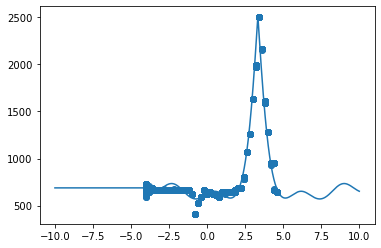

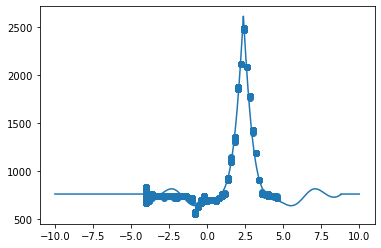

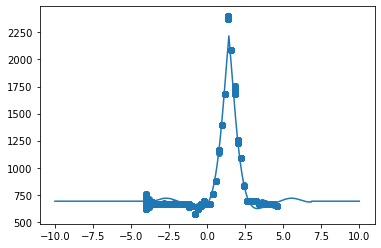

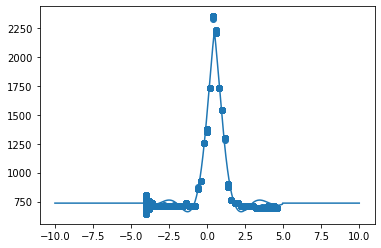

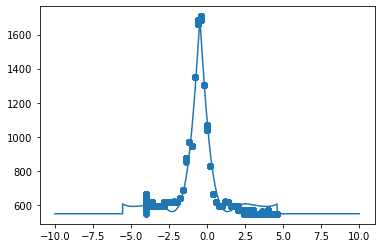

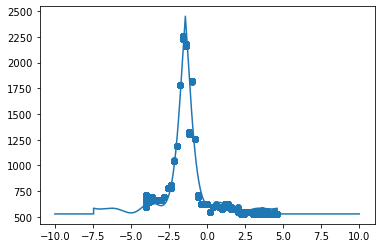

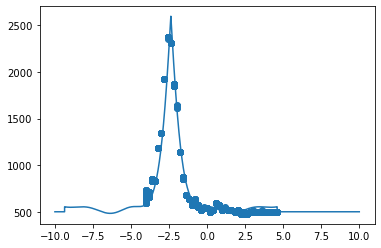

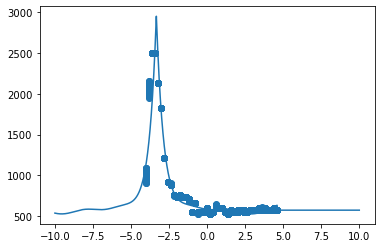

In [37]:
from sklearn.neighbors import KNeighborsRegressor

t=np.arange(-10,10,0.001)
for i in range(8):
    x=np.abs(line_locs-sensor_locs[i])
    
    model=SensorValueModel().fit(x,X[i,:])
    
    p=plt.plot(line_locs,X[i,:],"o")

    plt.plot(t,model.get_value(np.abs(t-sensor_locs[i])),color=p[0].get_color())
    plt.show()

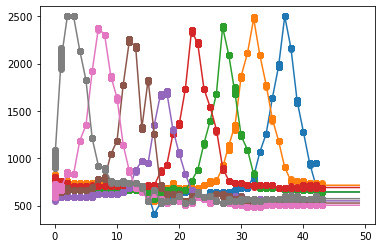

In [20]:
from sklearn.neighbors import KNeighborsRegressor

t=np.arange(0,50)
for i in range(8):
    model=KNeighborsRegressor(n_neighbors=5,weights='distance').fit(T.reshape(-1, 1),np.log(X[i,:]))

    p=plt.plot(T,X[i,:],"o")

    plt.plot(t,np.exp(model.predict(t.reshape(-1, 1))),color=p[0].get_color())

In [66]:
p[0]

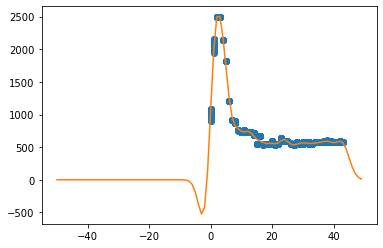

In [54]:
from sklearn.kernel_ridge import KernelRidge

model=KernelRidge(kernel='rbf', gamma=0.1).fit(T.reshape(-1, 1),X[7,:])

plt.plot(T,X[7,:],"o")
t=np.arange(-50,50)
plt.plot(t,model.predict(t.reshape(-1, 1)))

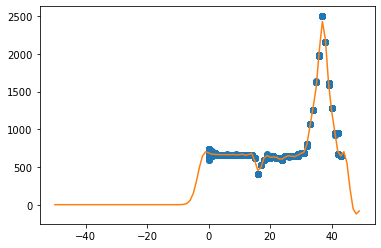

In [60]:
from sklearn.kernel_ridge import KernelRidge

model=KernelRidge(kernel='rbf', gamma=0.1,alpha=0.01).fit(T.reshape(-1, 1),X[0,:])

plt.plot(T,X[0,:],"o")
t=np.arange(-50,50)
plt.plot(t,model.predict(t.reshape(-1, 1)))

In [38]:
raw_data.shape

(97, 8)